In [11]:
from sqlalchemy import create_engine
from sqlalchemy import (
    Column,
    ForeignKey,
    Integer,
    DateTime,
    Float,
    DateTime,
    Float,
    String,
    Text,
)
from sqlalchemy.orm import relationship
from sqlalchemy.orm import sessionmaker
import sqlalchemy as db
from sqlalchemy.ext.declarative import declarative_base

USERNAME = input("Enter Username of SQL")
PASSWORD = input("Enter Password of SQL")
SERVER = "localhost"

# DEFINE THE ENGINE (CONNECTION OBJECT)
engine = create_engine(
    f"mysql+pymysql://{USERNAME}:{PASSWORD}@{SERVER}:3306/currencies", echo=False
)

Base = declarative_base()

/tmp/ipykernel_15169/4264874063.py:27: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [12]:
class Currency(Base):
    __tablename__ = "currency"

    id = Column(Integer, primary_key=True, unique=True, autoincrement=True)
    name = Column(String(255), nullable=True)
    symbol = Column(String(255), nullable=True)
    rank = Column(Integer, nullable=True)
    main_link = Column(Text, nullable=True)
    historical_link = Column(Text, nullable=True)
    circulating_supply = Column(Float, nullable=True)

    # github = relationship("Github", back_populates="currency")  # , uselist=False
    historicals = relationship("Historical", back_populates="currency")
    languages = relationship(
        "Language", secondary="languages_currency", back_populates="currencies"
    )
    tags = relationship("Tag", secondary="tags_currency", back_populates="currencies")

    def __repr__(self):
        return f"<Currency(id={self.id}, name='{self.name}', symbol='{self.symbol}')>"

In [13]:
class GitHub(Base):
    __tablename__ = "github"

    id = Column(Integer, primary_key=True, unique=True, autoincrement=True)
    currency_id = Column(Integer, ForeignKey("currency.id"), nullable=True)
    commits_count = Column(Integer, nullable=True)
    contributors_count = Column(Integer, nullable=True)
    forks_count = Column(Integer, nullable=True)
    stars_count = Column(Integer, nullable=True)
    github_link = Column(Text, nullable=True)

    # Define a foreign key relationship to the 'currency' table
    currency = relationship("Currency")

    def __repr__(self):
        return f"<GitHub(id={self.id}, currency_id={self.currency_id})>"

In [14]:
class Historical(Base):
    __tablename__ = "historical"

    id = Column(Integer, primary_key=True, unique=True, autoincrement=True)
    currency_id = Column(Integer, ForeignKey("currency.id"), nullable=True)
    timeOpen = Column(DateTime, nullable=True)
    timeClose = Column(DateTime, nullable=True)
    timeHigh = Column(DateTime, nullable=True)
    timeLow = Column(DateTime, nullable=True)
    open = Column(Float, nullable=True)
    high = Column(Float, nullable=True)
    low = Column(Float, nullable=True)
    close = Column(Float, nullable=True)
    volume = Column(Float, nullable=True)
    marketCap = Column(Float, nullable=True)
    timestamp = Column(DateTime, nullable=True)

    # Define a foreign key relationship to the 'currency' table
    currency = relationship("Currency", back_populates="historicals")

    def __repr__(self):
        return f"<Historical(id={self.id}, currency_id={self.currency_id}, timestamp={self.timestamp})>"

In [15]:
class Language(Base):
    __tablename__ = "languages"

    id = Column(Integer, primary_key=True, unique=True, nullable=False)
    name = Column(String(255), nullable=True)

    # Define a one-to-many relationship with 'tags_currency' table
    currencies = relationship(
        "Currency", secondary="languages_currency", back_populates="languages"
    )

    def __repr__(self):
        return f"<Language(id={self.id}, name='{self.name}')>"

In [16]:
class LanguageCurrency(Base):
    __tablename__ = "languages_currency"

    id = Column(Integer, primary_key=True, unique=True, autoincrement=True)
    currency_id = Column(Integer, ForeignKey("currency.id"), nullable=True)
    language_id = Column(Integer, ForeignKey("languages.id"), nullable=True)
    percentage = Column(Float, nullable=True)

    def __repr__(self):
        return f"<LanguageCurrency(id={self.id},currency_id={self.currency_id}, language_id={self.language_id}, percentage={self.percentage})>"

In [17]:
class Tag(Base):
    __tablename__ = "tags"

    id = Column(Integer, primary_key=True, nullable=False)
    name = Column(String(255), nullable=True)

    # Define a one-to-many relationship with 'tags_currency' table
    currencies = relationship(
        "Currency", secondary="tags_currency", back_populates="tags"
    )

    def __repr__(self):
        return f"<Tag(id={self.id}, name='{self.name}')>"

In [18]:
class TagsCurrency(Base):
    __tablename__ = "tags_currency"

    id = Column(Integer, primary_key=True, autoincrement=True)
    currency_id = Column(Integer, ForeignKey("currency.id"), nullable=True)
    tag_id = Column(Integer, ForeignKey("tags.id"), nullable=True)

    def __repr__(self):
        return f"<TagsCurrency(id={self.id}, currency_id={self.currency_id}, tag_id={self.tag_id})>"

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

# Question 1 :


### Extract historical data solution 1 :


In [20]:
# CREATE A SESSION OBJECT TO INITIATE QUERY
# IN DATABASE
Session = sessionmaker(bind=engine)
session = Session()


# SELECT currency_id, volume, marketCap FROM historical
results = (
    session.query(
        Historical.currency_id,
        Historical.volume,
        Historical.marketCap,
        Historical.timestamp,
    )
    # .where(Historical.currency_id == 154)
    .all()
)

df1 = pd.DataFrame(
    [(r.currency_id, r.volume, r.marketCap, r.timestamp) for r in results],
    columns=["currency_id", "volume", "marketCap", "timestamp"],
)

### Extract historical data solution 2 :


In [21]:
from sqlalchemy import text

conn = engine.connect()

# Define the SQL query
sql_query = text(
    """
    SELECT currency_id, volume, marketCap, timestamp
    FROM historical
"""
)

# Execute the SQL query
result = conn.execute(sql_query)

# Fetch the results
selected_rows = result.fetchall()

# Close the database connection when you're done
conn.close()

df1 = pd.DataFrame(
    [(r.currency_id, r.volume, r.marketCap, r.timestamp) for r in selected_rows],
    columns=["currency_id", "volume", "marketCap", "timestamp"],
)

In [22]:
print(df1.shape)
df1.head()

(70337, 4)


,currency_id,volume,marketCap,timestamp
0,154,5871295.09,1.375358e+08,2023-09-01
1,154,8818782.31,1.398643e+08,2023-08-31
2,154,5742333.46,1.470167e+08,2023-08-30
3,154,8196429.59,1.517058e+08,2023-08-29
4,154,8435254.17,1.451768e+08,2023-08-28


### Scatter plot of the whole data


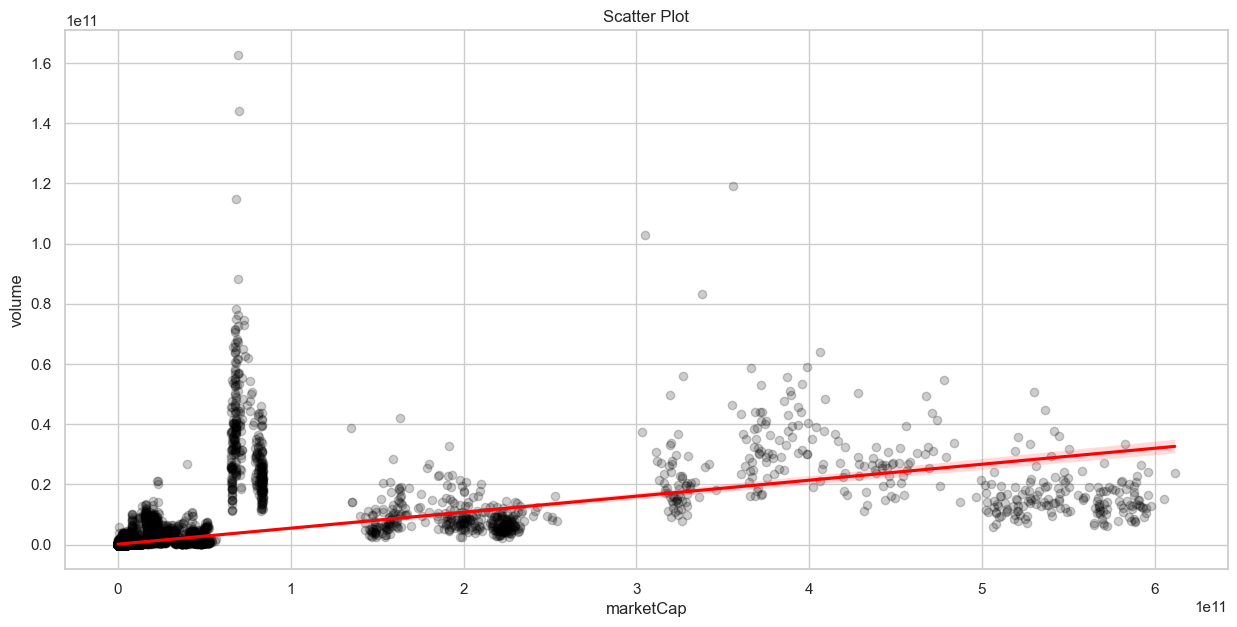

In [23]:
plt.figure(figsize=(15, 7))
plt.title("Scatter Plot")
plt.xlabel("marketCap")
plt.ylabel("volume")

sns.regplot(
    x=df1["marketCap"],
    y=df1["volume"],
    scatter_kws={"color": "black", "alpha": 0.2},
    line_kws={"color": "red"},
    ci=99,
)

plt.show()

### Devide the data to 4 parts


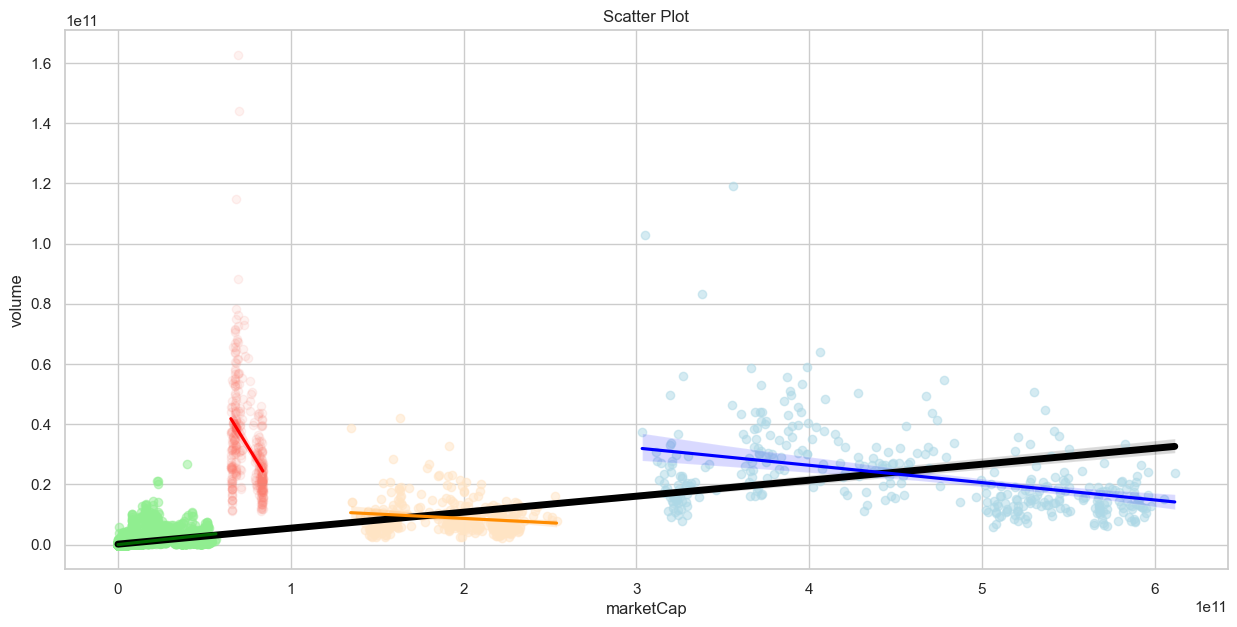

In [24]:
df1_1_1 = df1[df1["marketCap"] < 6e10]
df1_1_2 = df1[(6e10 < df1["marketCap"]) & (df1["marketCap"] < 1e11)]
df1_1_3 = df1[(1e11 < df1["marketCap"]) & (df1["marketCap"] < 3e11)]
df1_1_4 = df1[3e11 < df1["marketCap"]]

plt.figure(figsize=(15, 7))
plt.title("Scatter Plot")
plt.xlabel("marketCap")
plt.ylabel("volume")

sns.regplot(
    x=df1["marketCap"],
    y=df1["volume"],
    scatter_kws={"color": "black", "alpha": 0},
    line_kws={"color": "black", "linewidth": 5},
    ci=99,
)

sns.regplot(
    x=df1_1_1["marketCap"],
    y=df1_1_1["volume"],
    scatter_kws={"color": "lightgreen", "alpha": 0.5},
    line_kws={"color": "darkgreen"},
    ci=99,
)

sns.regplot(
    x=df1_1_2["marketCap"],
    y=df1_1_2["volume"],
    scatter_kws={"color": "salmon", "alpha": 0.1},
    line_kws={"color": "red"},
    ci=99,
)

sns.regplot(
    x=df1_1_3["marketCap"],
    y=df1_1_3["volume"],
    scatter_kws={"color": "bisque", "alpha": 0.5},
    line_kws={"color": "darkorange"},
    ci=99,
)

sns.regplot(
    x=df1_1_4["marketCap"],
    y=df1_1_4["volume"],
    scatter_kws={"color": "lightblue", "alpha": 0.5},
    line_kws={"color": "blue"},
    ci=99,
)

plt.show()

### Devide the data to 2 parts


(69245, 4)
(1092, 4)


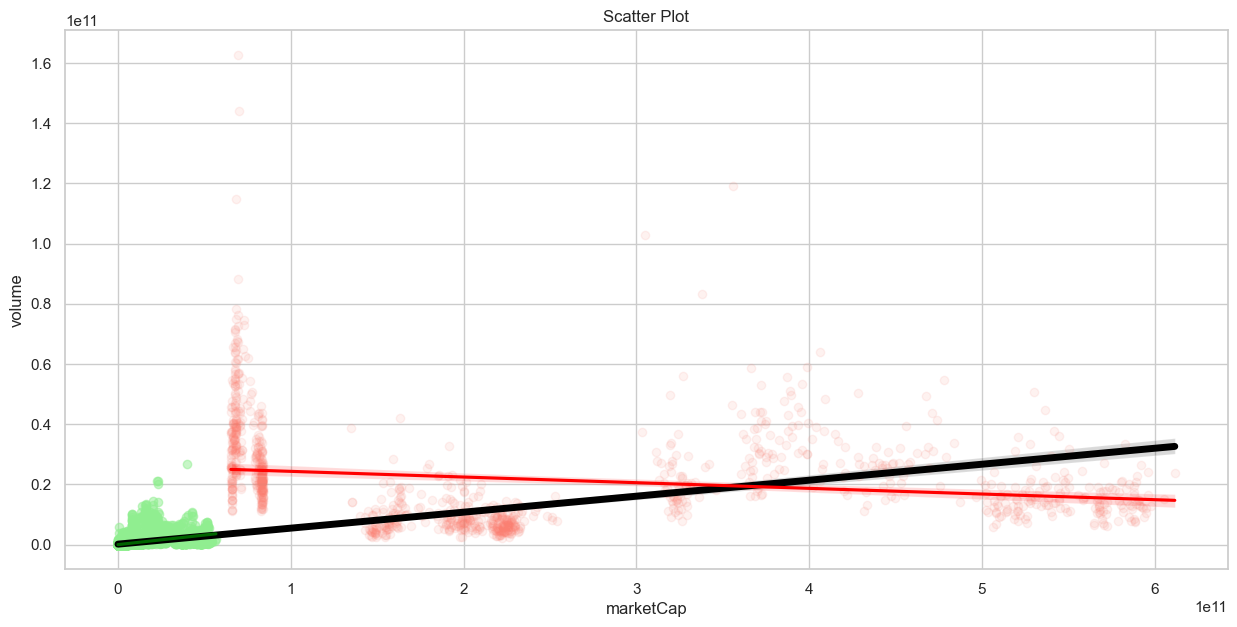

In [25]:
df1_2_1 = df1[df1["marketCap"] < 6e10]
df1_2_2 = df1[6e10 < df1["marketCap"]]
print(df1_2_1.shape)
print(df1_2_2.shape)

plt.figure(figsize=(15, 7))
plt.title("Scatter Plot")
plt.xlabel("marketCap")
plt.ylabel("volume")

sns.regplot(
    x=df1["marketCap"],
    y=df1["volume"],
    scatter_kws={"color": "black", "alpha": 0},
    line_kws={"color": "black", "linewidth": 5},
    ci=99,
)

sns.regplot(
    x=df1_2_1["marketCap"],
    y=df1_2_1["volume"],
    scatter_kws={"color": "lightgreen", "alpha": 0.5},
    line_kws={"color": "darkgreen"},
    ci=99,
)

sns.regplot(
    x=df1_2_2["marketCap"],
    y=df1_2_2["volume"],
    scatter_kws={"color": "salmon", "alpha": 0.1},
    line_kws={"color": "red"},
    ci=99,
)


plt.show()

### Scatter Plot of all Coins in Day: "2023-09-01"


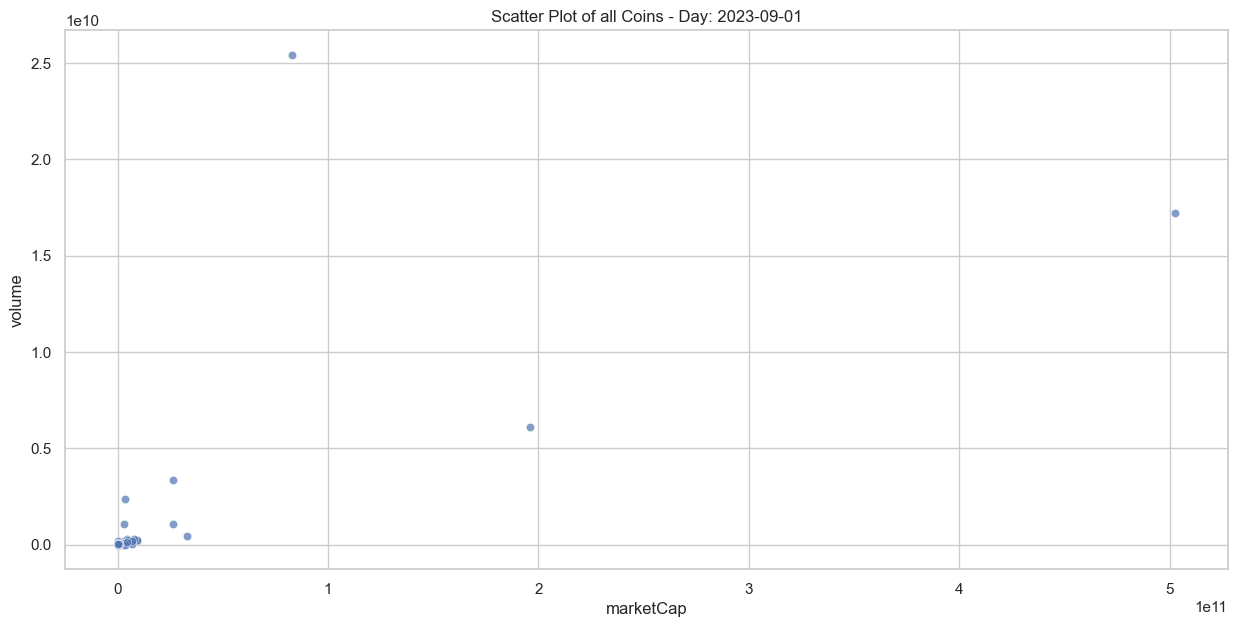

In [26]:
# df1[(df1["timestamp"] == day) & (df1["currency_id"].isin(range(4, 201)))]

day = "2023-09-01"
df1_3 = df1[df1["timestamp"] == day]

plt.figure(figsize=(15, 7))
plt.title(f"Scatter Plot of all Coins - Day: {day}")
plt.xlabel("marketCap")
plt.ylabel("volume")

sns.scatterplot(x=df1_3["marketCap"], y=df1_3["volume"], alpha=0.7)

plt.show()

### Scatter Plot of 3 Best Coins


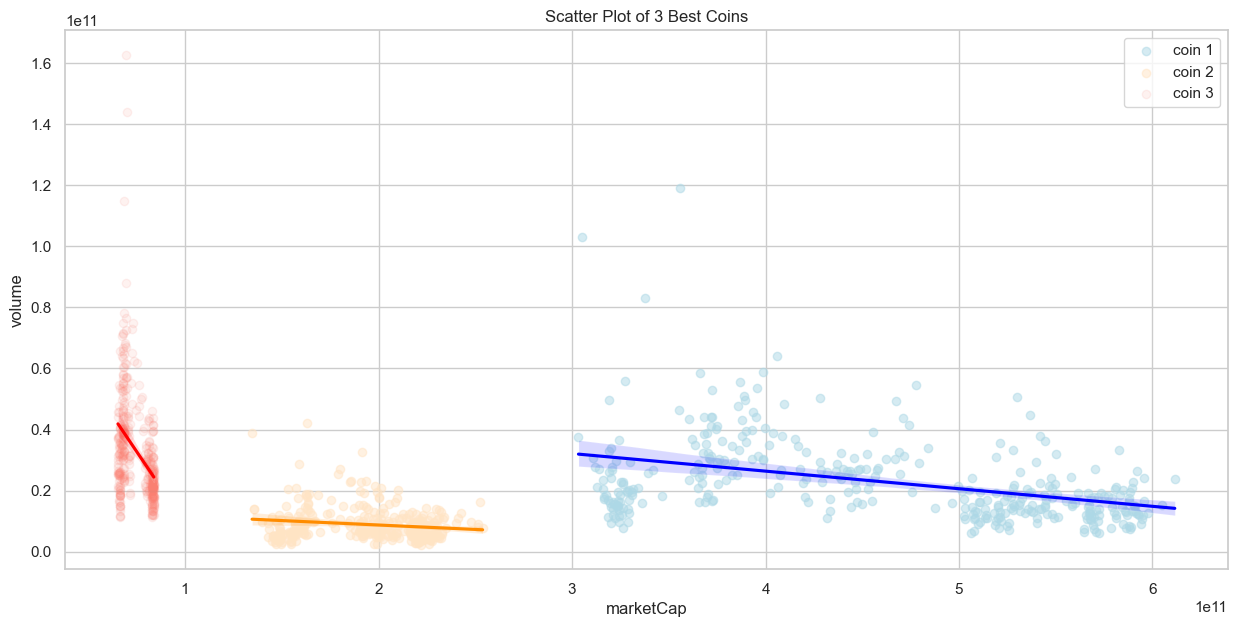

(200, 4)

In [27]:
df1_4 = df1[df1["currency_id"].isin([1, 2, 3])]

df1_4_1 = df1[df1["currency_id"] == 1]
df1_4_2 = df1[df1["currency_id"] == 2]
df1_4_3 = df1[df1["currency_id"] == 3]


plt.figure(figsize=(15, 7))
plt.title(f"Scatter Plot of 3 Best Coins")
plt.xlabel("marketCap")
plt.ylabel("volume")

sns.regplot(
    x=df1_4_1["marketCap"],
    y=df1_4_1["volume"],
    scatter_kws={"color": "lightblue", "alpha": 0.5},
    line_kws={"color": "blue"},
    ci=99,
    label="coin 1",
)

sns.regplot(
    x=df1_4_2["marketCap"],
    y=df1_4_2["volume"],
    scatter_kws={"color": "bisque", "alpha": 0.5},
    line_kws={"color": "darkorange"},
    ci=99,
    label="coin 2",
)

sns.regplot(
    x=df1_4_3["marketCap"],
    y=df1_4_3["volume"],
    scatter_kws={"color": "salmon", "alpha": 0.1},
    line_kws={"color": "red"},
    ci=99,
    label="coin 3",
)

plt.legend()
plt.show()

df1_3.shape

### Scatter Plot of other 197 Coins


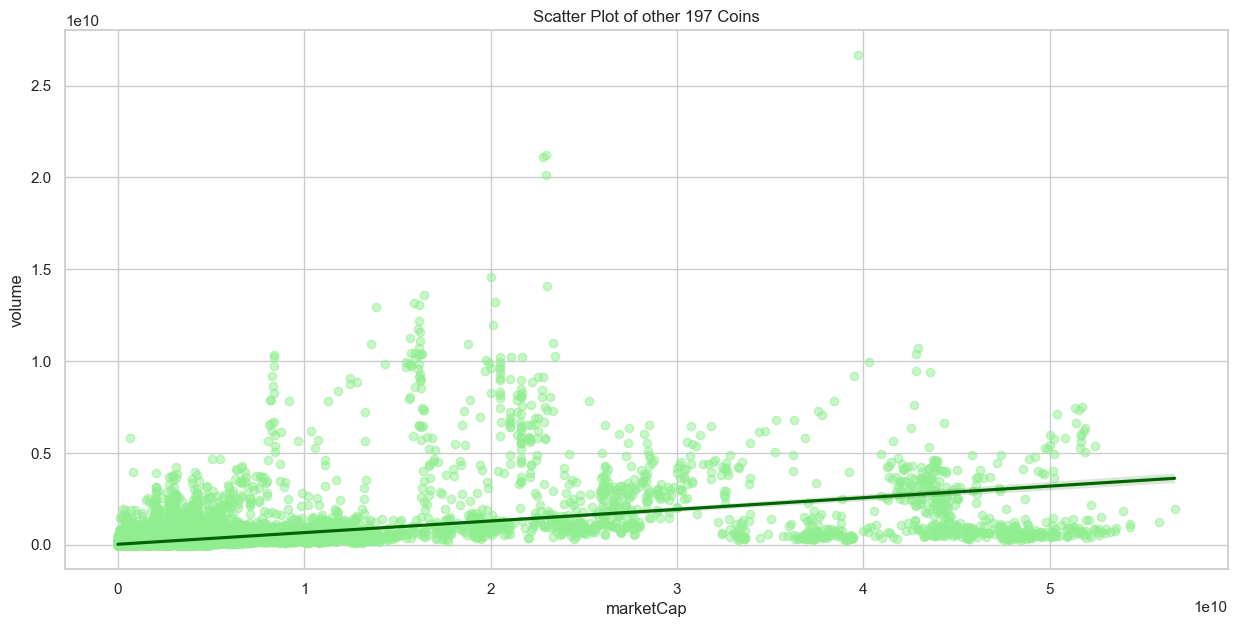

In [28]:
df1_5 = df1[df1["currency_id"].isin(range(4, 201))]

plt.figure(figsize=(15, 7))
plt.title(f"Scatter Plot of other 197 Coins")
plt.xlabel("marketCap")
plt.ylabel("volume")

sns.regplot(
    x=df1_5["marketCap"],
    y=df1_5["volume"],
    scatter_kws={"color": "lightgreen", "alpha": 0.5},
    line_kws={"color": "darkgreen"},
    ci=99,
)

plt.show()

# Question 2 : Coins Correlation


### Extract data from DB


In [29]:
from sqlalchemy import text

conn_2 = engine.connect()

# metadata = db.MetaData()
# currency = db.Table("currency", metadata, autoload=True, autoload_with=engine)
# historical = db.Table("historical", metadata, autoload=True, autoload_with=engine)


# Define the SQL query
sql_query_2 = text(
    """
    SELECT c.name, c.symbol, c.circulating_supply, h.currency_id , h.volume, h.marketCap, h.open, h.close, h.timestamp
    FROM currency AS c
    JOIN historical AS h ON c.id = h.currency_id;
"""
)

# Method 2 using sql alchemy

# query = (
#     session.query(
#         Currency.name,
#         Currency.symbol,
#         Currency.circulating_supply,
#         Historical.currency_id,
#         Historical.volume,
#         Historical.marketCap,
#         Historical.open,
#         Historical.close,
#         Historical.timestamp
#     )
#     .join(Historical, Currency.id == Historical.currency_id)
# )

# results = query.all()


# Execute the SQL query
result_2 = conn_2.execute(sql_query_2)

# Fetch the results
selected_rows_2 = result_2.fetchall()

# Close the database connection when you're done
conn_2.close()

df_2 = pd.DataFrame(
    [
        (
            r.currency_id,
            r.name,
            r.symbol,
            r.circulating_supply,
            r.volume,
            r.marketCap,
            r.open,
            r.close,
            r.timestamp,
        )
        for r in selected_rows_2
    ],
    columns=[
        "Currency_id",
        "Name",
        "Symbol",
        "Circulating_Supply",
        "Volume",
        "Marketcap",
        "Open",
        "Close",
        "Date",
    ],
)

In [30]:
print(df_2.shape)
df_2.head()

(70337, 9)


,Currency_id,Name,Symbol,Circulating_Supply,Volume,Marketcap,Open,Close,Date
0,1,Bitcoin,BTC,19467775.0,1.720286e+10,5.024359e+11,25934.020806,25800.724373,2023-09-01
1,1,Bitcoin,BTC,19467775.0,2.018100e+10,5.049576e+11,27301.929317,25931.472893,2023-08-31
2,1,Bitcoin,BTC,19467775.0,1.634366e+10,5.315289e+11,27726.084034,27297.265348,2023-08-30
3,1,Bitcoin,BTC,19467775.0,2.936839e+10,5.398825e+11,26102.485832,27727.393009,2023-08-29
4,1,Bitcoin,BTC,19467775.0,1.100281e+10,5.082885e+11,26089.614923,26106.150044,2023-08-28


In [60]:
# Assume df is a DataFrame with columns 'date', 'symbol' and 'Price_Change'
df_2["Price_Change"] = df_2["Close"] - df_2["Open"]
df_2["Direction"] = df_2["Price_Change"].apply(
    lambda x: 1 if x > 0 else -1 if x < 0 else 0
)
df_pivot = df_2.pivot(index="Date", columns="Symbol", values="Direction")

# Count the number of days two currencies change in the same direction
same_direction_days = (
    df_pivot.corr()
    .stack()
    .rename_axis(("Symbol1", "Symbol2"))
    .reset_index(name="Correlation")
)
same_direction_days.columns = ["Symbol1", "Symbol2", "Correlation"]
same_direction_days = same_direction_days[
    same_direction_days["Symbol1"] < same_direction_days["Symbol2"]
]
same_direction_days["same_direction_days"] = same_direction_days["Correlation"] * len(
    df_pivot
)
same_direction_days["same_direction_days"] = (
    same_direction_days["same_direction_days"].round().astype(int)
)
same_direction_days = same_direction_days.sort_values(
    "same_direction_days", ascending=False
)

# Print the top 30 pairs
print(same_direction_days.head(30))

      Symbol1 Symbol2  Correlation  same_direction_days
6182      BTC    WBTC     0.928348                  338
22546    MANA    SAND     0.774533                  282
12278     ETH     GNO     0.746149                  272
11546     ENJ    SAND     0.742385                  270
12382     ETH    WBTC     0.724320                  264
22541    MANA    ROSE     0.709369                  258
11512     ENJ    MANA     0.704084                  256
28346    ROSE    SAND     0.703724                  256
3946      AXS    SAND     0.703063                  256
22579    MANA     VET     0.703359                  256
6061      BTC     ETH     0.696604                  254
3912      AXS    MANA     0.697404                  254
1798     ANKR     ZIL     0.693126                  252
17746     ICX    SAND     0.692075                  252
35999     VET     ZRX     0.692349                  252
5234      BNB    CAKE     0.689289                  251
35994     VET     XTZ     0.686805              

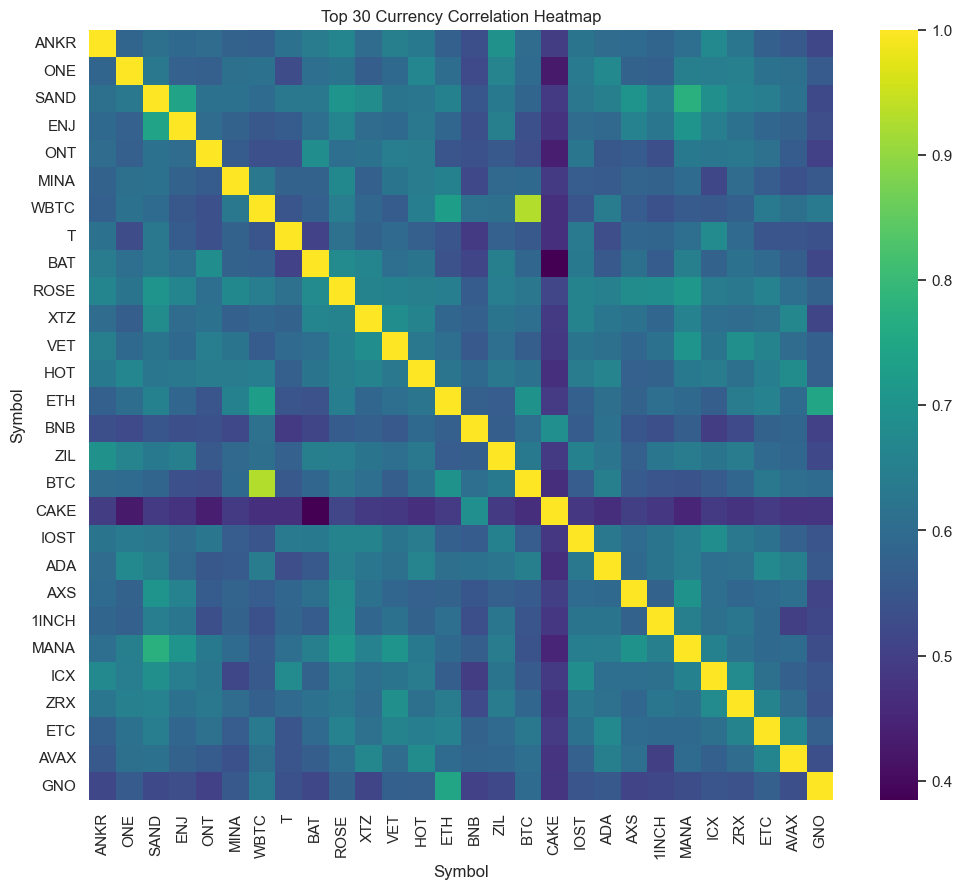

In [76]:
# Get the top 30 pairs
top_30 = same_direction_days.sort_values("same_direction_days", ascending=False).head(
    30
)

# Filter the correlation matrix for the top symbols
symbols = list(set(top_30["Symbol1"].tolist() + top_30["Symbol2"].tolist()))

# Create the correlation matrix
corr_subset = df_pivot[symbols].corr()

# Create the figure and the axes
fig, ax = plt.subplots(figsize=(12, 10))
# Plot the heatmap with the filtered correlation matrix

sns.heatmap(corr_subset, annot=False, cmap="viridis", ax=ax)
ax.set_title("Top 30 Currency Correlation Heatmap")
plt.show()

# Question 3 :


### Extract data from DB


In [33]:
from sqlalchemy import text

conn_3 = engine.connect()

# Define the SQL query
sql_query_3 = text(
    """
    WITH x AS (
        SELECT distinct tc.currency_id as currency_id
        FROM tags_currency AS tc
        INNER JOIN tags as t
        ON t.id = tc.tag_id
        WHERE t.name = 'Mineable')
    SELECT h.currency_id, c.name, h.volume
    FROM historical AS h
    INNER JOIN x
    ON h.currency_id = x.currency_id
    INNER JOIN currency AS c ON c.id =  h.currency_id
"""
)

# Method 2 using sql alchemy

# Create an alias for the CTE
# x = aliased(
#     session.query(distinct(TagsCurrency.currency_id).label('currency_id'))
#     .join(Tags, Tags.id == TagsCurrency.tag_id)
#     .filter(Tags.name == 'Mineable')
#     .subquery()
# )

# query = (
#     session.query(Historical.currency_id, Currency.name, Historical.volume)
#     .join(x, Historical.currency_id == x.c.currency_id)
#     .join(Currency, Currency.id == Historical.currency_id)
# )

# results = query.all()


# Execute the SQL query
result_3 = conn_3.execute(sql_query_3)

# Fetch the results
selected_rows_3 = result_3.fetchall()

# Close the database connection when you're done
conn_3.close()

df_3 = pd.DataFrame(
    [(r.currency_id, r.name, r.volume) for r in selected_rows_3],
    columns=["currency_id", "name", "volume"],
)
df_3.shape

(8372, 3)

In [34]:
df_3.head()

,currency_id,name,volume
0,1,Bitcoin,1.720286e+10
1,1,Bitcoin,2.018100e+10
2,1,Bitcoin,1.634366e+10
3,1,Bitcoin,2.936839e+10
4,1,Bitcoin,1.100281e+10


The name of minable coins :


In [35]:
print("The number of minable coins :", np.count_nonzero(list(set(df_3["name"]))))
print("The name of minable coins :\n", list(set(df_3["name"])))

The number of minable coins : 23
The name of minable coins :
 ['Zcash', 'Nervos Network', 'Ethereum Classic', 'Zilliqa', 'Helium', 'Dash', 'Flux', 'Monero', 'Siacoin', 'Bitcoin', 'Kadena', 'Litecoin', 'Conflux', 'Bitcoin Gold', 'Dogecoin', 'Horizen', 'Bitcoin Cash', 'Bitcoin SV', 'Filecoin', 'Ravencoin', 'Stacks', 'Decred', 'DigiByte']


### Plot Volume Distribution


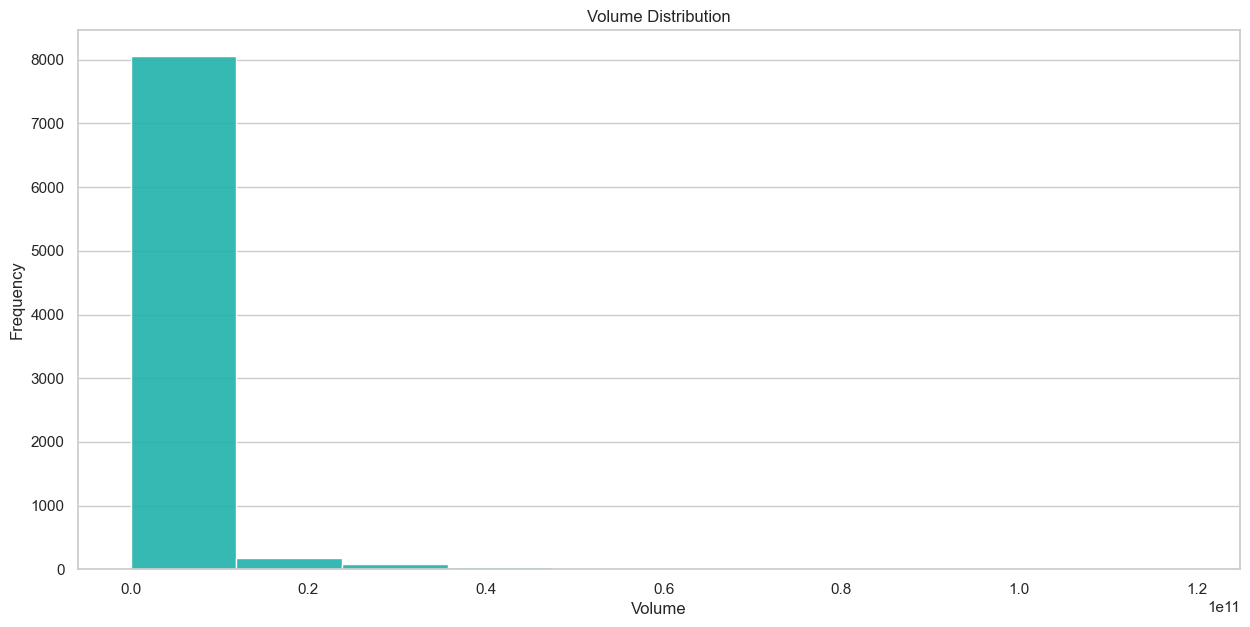

In [36]:
plt.figure(figsize=(15, 7))
plt.title("Volume Distribution")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.grid(axis="x")

sns.histplot(data=df_3, x="volume", bins=10, color="lightseagreen", alpha=0.9)

plt.show()

# Question 4 :


### Extract data from DB


In [37]:
from sqlalchemy import text

conn_4 = engine.connect()

# Define the SQL query
sql_query_4 = text(
    """
    WITH x AS (SELECT id, name FROM currency LIMIT 16)
    SELECT x.id, x.name, h.open, h.close 
    FROM historical AS h
    INNER JOIN x ON x.id = h.currency_id
"""
)

# Method 2 using sql alchemy

# cte = (
#     select([Currency.id, Currency.name])
#     .limit(16)
#     .cte('x')
# )

# query = (
#     session.query(cte.c.id, cte.c.name, Historical.open, Historical.close)
#     .join(Historical, cte.c.id == Historical.currency_id)
# )

# results = query.all()


# Execute the SQL query
result_4 = conn_4.execute(sql_query_4)

# Fetch the results
selected_rows_4 = result_4.fetchall()

# Close the database connection when you're done
conn_4.close()

df_4 = pd.DataFrame(
    [(r.id, r.name, r.open, r.close) for r in selected_rows_4],
    columns=["currency_id", "name", "open", "close"],
)
df_4_1 = pd.DataFrame([])
for id in set(df_4["currency_id"]):
    df_new = df_4[df_4["currency_id"] == id]
    changes = df_new["close"] - df_new["open"]
    name = df_new["name"].iloc[0]
    df_4_1[name] = changes.tolist()

In [38]:
df_4_1.head()

,Bitcoin,Ethereum,Tether USDt,BNB,XRP,USD Coin,Cardano,Dogecoin,Solana,TRON,Polkadot,Dai,Polygon,Toncoin,Litecoin,Shiba Inu
0,-133.296434,-17.090130,-0.000101,-2.967929,-0.012714,0.000081,-0.000183,0.000063,-0.406912,-0.000621,-0.053691,0.000281,-0.008864,0.194015,-0.938614,-9.664658e-08
1,-1370.456423,-59.725342,-0.000192,-7.220783,-0.017397,0.000003,-0.010302,-0.002055,-1.098745,0.001080,-0.266973,-0.000303,-0.025713,0.029379,-3.709447,-1.766181e-07
2,-428.818686,-24.564441,0.000037,-3.070718,-0.011851,0.000128,-0.006811,-0.000556,-0.947123,-0.001708,-0.137185,-0.000063,-0.018306,-0.002358,-1.233536,-2.095795e-07
3,1624.907177,77.451430,0.000711,8.141369,0.016813,0.000105,0.005027,0.002956,1.223896,0.000952,0.066614,0.000136,0.031343,0.208841,3.350720,1.401820e-07
4,16.535121,-4.982405,-0.000186,0.360317,-0.000592,-0.000084,0.003981,0.000264,-0.229864,-0.001132,0.113743,0.000021,0.006056,-0.003109,0.174697,1.864802e-07


### Plot Correlation Matrix for all Columns


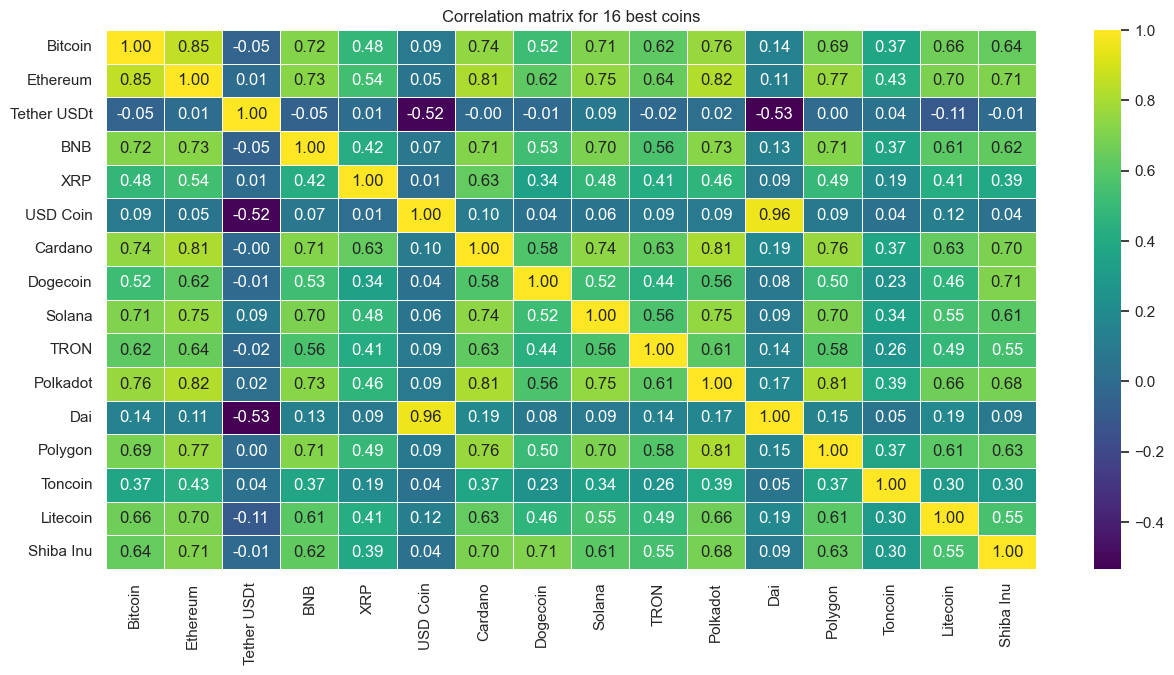

In [39]:
correlation_matrix = df_4_1.corr()
plt.figure(figsize=(15, 7))
plt.title("Correlation matrix for 16 best coins")

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="viridis",
    fmt=".2f",
    linewidths=0.6,
)
# plt.tight_layout()
plt.show()

In [40]:
# corr = df_4_1.corr()
# corr.style.background_gradient(cmap="coolwarm")

# Qestion 5 : Top 10 Coins in Red Days


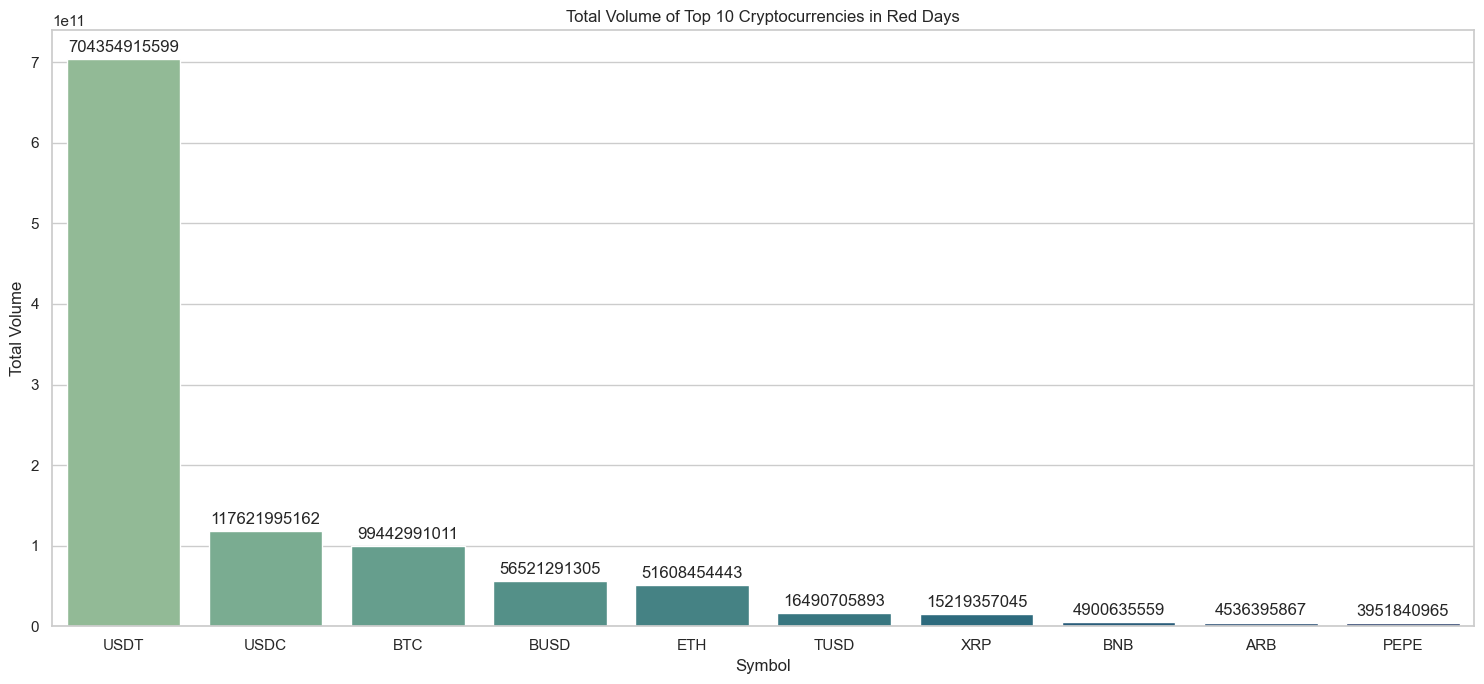

In [125]:
# Assume df is a DataFrame with columns 'date', 'symbol' and 'Price_Change'
df_red_days = df_2[df_2["Price_Change"] > 0]

df_negative = df_red_days.groupby(by="Date")["Direction"].count()

red_days_list = df_negative[df_negative < 70].reset_index("Date")["Date"].tolist()

df_red_days = df_red_days[df_red_days["Date"].isin(red_days_list)]
df_red_days["Date"] = pd.to_datetime(df_red_days["Date"])

# Filter out the data for Spring 2023
df_2023_spring = df_red_days[
    (df_red_days["Date"].dt.year == 2023)
    & (df_red_days["Date"].dt.month.isin([3, 4, 5]))
]

# Calculate the total volume for each symbol in the red days
total_volume = (
    df_2023_spring.groupby("Symbol")["Volume"].sum().sort_values(ascending=False)
)

# Select the top 10 symbols
top_10_symbols = total_volume.head(10)

df_5 = pd.DataFrame(
    {
        "Symbol": total_volume.head(10).index,
        "Total Volume": total_volume.head(10).values,
    }
)

# Plot the bar chart
plt.figure(figsize=(15, 7))
plt.title("Total Volume of Top 10 Cryptocurrencies in Red Days")
plt.xlabel("Symbol")
plt.ylabel("Total Volume")

bars = sns.barplot(x="Symbol", y="Total Volume", data=df_5, palette="crest")

# bars = plt.bar(top_10_symbols.index, top_10_symbols.values)

for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(
        f"{round(height)}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=12,
    )
plt.tight_layout()
plt.show()

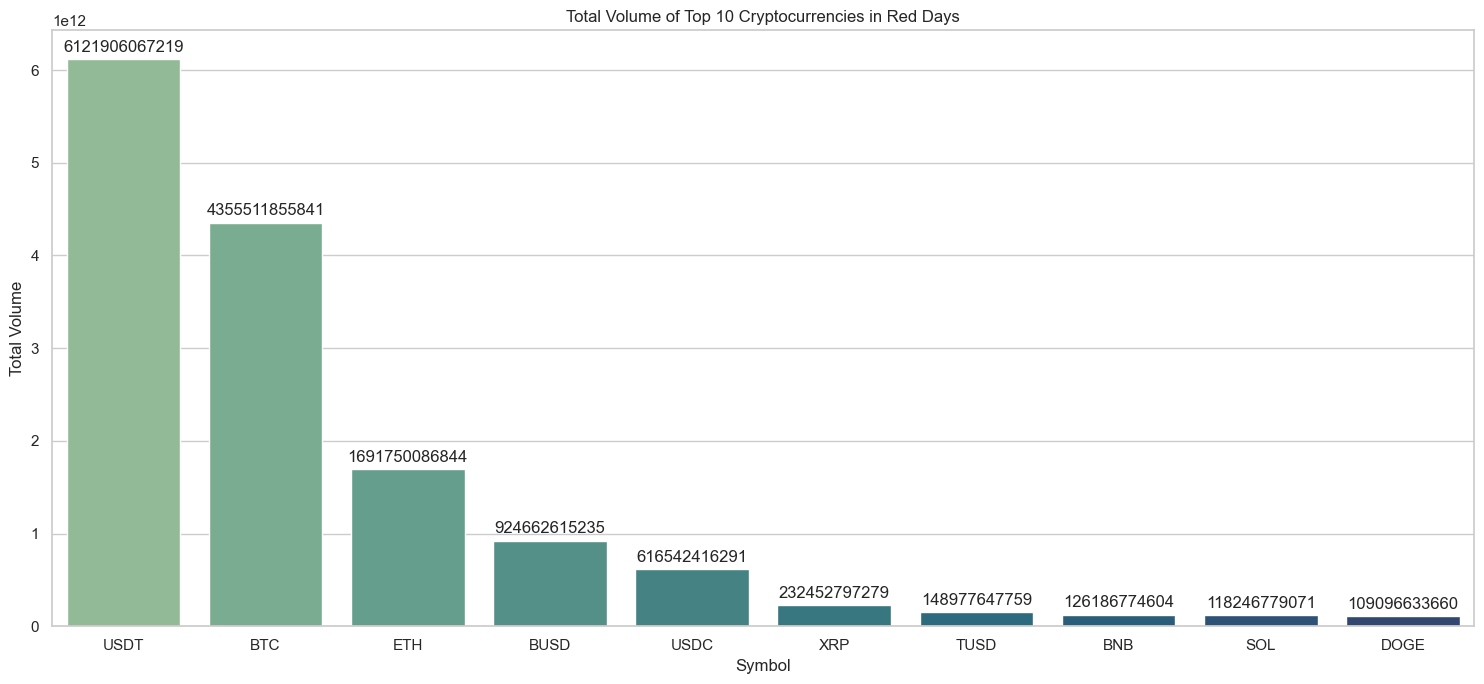

In [41]:
# Assume df is a DataFrame with columns 'date', 'symbol' and 'Price_Change'
df_red_days = df_2[df_2["Price_Change"] < 0]

# Calculate the total volume for each symbol in the red days
total_volume = (
    df_red_days.groupby("Symbol")["Volume"].sum().sort_values(ascending=False)
)

# Select the top 10 symbols
top_10_symbols = total_volume.head(10)


df_5 = pd.DataFrame(
    {
        "Symbol": total_volume.head(10).index,
        "Total Volume": total_volume.head(10).values,
    }
)

# Plot the bar chart
plt.figure(figsize=(15, 7))
plt.title("Total Volume of Top 10 Cryptocurrencies in Red Days")
plt.xlabel("Symbol")
plt.ylabel("Total Volume")

bars = sns.barplot(x="Symbol", y="Total Volume", data=df_5, palette="crest")

# bars = plt.bar(top_10_symbols.index, top_10_symbols.values)

for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(
        f"{round(height)}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=12,
    )
plt.tight_layout()
plt.show()